<a target="_blank" href="https://colab.research.google.com/github/LBL-EESA/fastkde/blob/main/examples/fastKDE%20and%20xarray.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook demonstrates basic usage of `fastkde.plot` with `xarray`.

In [1]:
import numpy as np

try:
    import fastkde
    import xarray
except:
    # install fastkde
    !pip install --upgrade fastkde
    import fastkde

import matplotlib.pyplot as plt

For this example, we will generate data with the following relationships:

$$ x := \mathcal{N}(0,\pi)$$
$$ y := \mathcal{N}(\sin(x), 1)$$

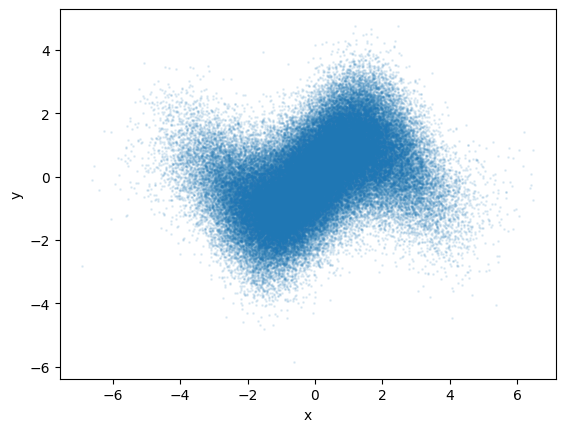

In [2]:
""" Sample the two variables """
N = int(1e5)
x = np.random.normal(size=N, scale=np.pi / 2)
y = np.sin(x) + np.random.normal(scale=1, size=N)

# plot the data
plt.scatter(x, y, s=1, alpha=0.1)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
""" Compute the PDF. """

pdf = fastkde.pdf(x, y, var_names=["x", "y"])
pdf

<xarray.DataArray (y: 128, x: 128)>
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.46960122e-06, 1.03550926e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.90796661e-06, 1.47632624e-05, 1.99725938e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.19889348e-05, 1.97721084e-05, 2.55981165e-05]])
Coordinates:
  * x        (x) float64 -6.896 -6.791 -6.687 -6.582 ... 6.05 6.154 6.259 6.363
  * y        (y) float64 -5.846 -5.764 -5.681 -5.598 ... 4.426 4.509 4.592 4.675
Attributes:
    long_name:  PDF(x,y)

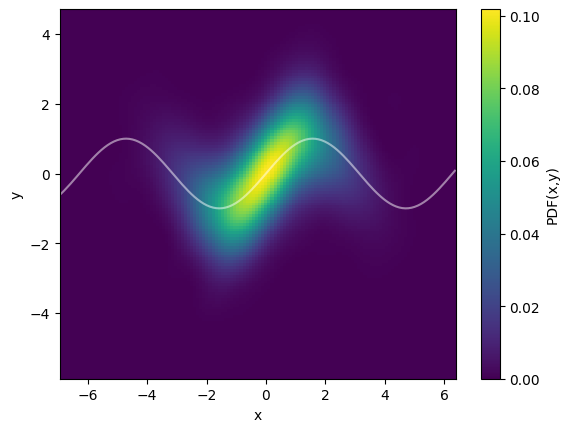

In [4]:
""" Plot the PDF using xarray. """
# plot a scatter of the input data
import matplotlib.pyplot as plt

pdf.plot()
plt.plot(pdf.x, np.sin(pdf.x), color="white", alpha=0.5);

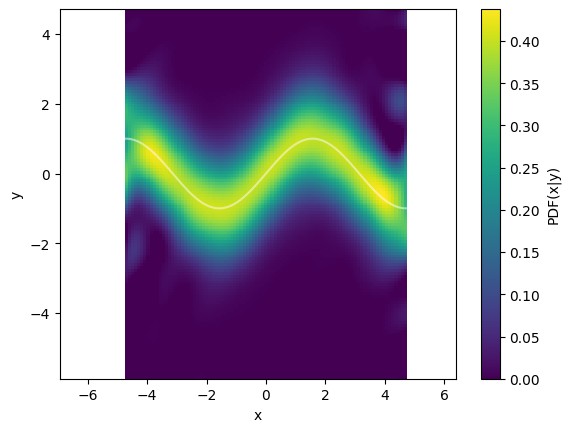

In [5]:
""" Compute and plot the conditional PDF using xarray. """

cpdf = fastkde.conditional(y, x, var_names=["y", "x"])

# plot the conditional
cpdf.plot()

# plot the true conditional mean
plt.plot(cpdf.x, np.sin(cpdf.x), color="white", alpha=0.5);